In [1]:
import sys
sys.path.append('/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function')
import noise_make as ns
import fg_make_file as fg
import cmb_make_file as cmb
import noise_make as ns
import alpha_Delta_map as dm
import healpy as hp
import numpy as np
from scipy.optimize import minimize
from numpy.linalg import solve as bslash

Using CAMB 1.5.2 installed at /Users/ikumakiyoshi/.julia/conda/3/lib/python3.10/site-packages/camb


###　共分散行列計算

In [2]:
nside = 4
random_seed_cmb = 5123
seed_syn = 5123

W, X = dm.Cal_sYlm(nside)
cl_scal, cl_lens, cl_tens = cmb.cmb_cell_make(nside, random_seed_cmb, seed_syn)
cl_scal = cl_scal + cl_lens

cl_scal = cl_scal.T
cl_tens = cl_tens.T

### ここの計算が重たい(これあってる？？？)

In [3]:
import time

start = time.time() 

# TT, EE, BB, TE
cov_mat_scal = dm.Cal_cov(W, X, cl_scal[1], cl_scal[2])
cov_mat_tens = dm.Cal_cov(W, X, cl_tens[1], cl_tens[2])

end = time.time()

time_diff = end - start
print(time_diff)

/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function/alpha_Delta_map.py:413: ComplexWarning: Casting complex values to real discards the imaginary part
  C[0:npix, 0:npix] = C_QQ
/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function/alpha_Delta_map.py:414: ComplexWarning: Casting complex values to real discards the imaginary part
  C[0:npix, npix:2*npix] = C_QU
/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function/alpha_Delta_map.py:415: ComplexWarning: Casting complex values to real discards the imaginary part
  C[npix:2*npix, 0:npix] = C_UQ
/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function/alpha_Delta_map.py:416: ComplexWarning: Casting complex values to real discards the imaginary part
  C[npix:2*np

299.9887812137604


In [4]:
#np.save("cov_mat_scal", cov_mat_scal)
#np.save("cov_mat_tens", cov_mat_tens)

In [5]:
cl_scal[1]
cl_tens[2]

array([0.        , 0.        , 0.03218081, 0.01588908, 0.00810637,
       0.00413024, 0.00208972, 0.00106537, 0.00057034])

In [6]:
dm.Cal_matrix(W, W, X, X, cl_scal[1], cl_scal[2])

array([[ 0.04576632-0.j, -0.03378388+0.j,  0.02649581-0.j, ...,
        -0.00624836-0.j,  0.00642622+0.j, -0.00624836+0.j],
       [-0.03378388-0.j,  0.04576632+0.j, -0.03378388-0.j, ...,
         0.00638711-0.j, -0.00624836+0.j,  0.00642622+0.j],
       [ 0.02649581-0.j, -0.03378388+0.j,  0.04576632-0.j, ...,
        -0.00624836+0.j,  0.00638711+0.j, -0.00624836-0.j],
       ...,
       [-0.00624836+0.j,  0.00638711-0.j, -0.00624836-0.j, ...,
         0.04576632-0.j, -0.03378388+0.j,  0.02649581-0.j],
       [ 0.00642622+0.j, -0.00624836-0.j,  0.00638711-0.j, ...,
        -0.03378388-0.j,  0.04576632+0.j, -0.03378388+0.j],
       [-0.00624836-0.j,  0.00642622-0.j, -0.00624836+0.j, ...,
         0.02649581+0.j, -0.03378388-0.j,  0.04576632-0.j]])

In [7]:
cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, 0.01)

In [8]:
cov_mat

array([[ 0.04604405, -0.0339935 ,  0.0266527 , ..., -0.00026345,
         0.        ,  0.00026345],
       [-0.0339935 ,  0.04604405, -0.0339935 , ...,  0.        ,
        -0.00026345,  0.        ],
       [ 0.0266527 , -0.0339935 ,  0.04604405, ...,  0.00026345,
         0.        , -0.00026345],
       ...,
       [-0.00026345,  0.        ,  0.00026345, ...,  0.04604405,
        -0.03466641,  0.0243245 ],
       [ 0.        , -0.00026345,  0.        , ..., -0.03466641,
         0.04604405, -0.03466641],
       [ 0.00026345,  0.        , -0.00026345, ...,  0.0243245 ,
        -0.03466641,  0.04604405]])

### noisde　作成

In [9]:
noise_seed = [1, 2, 3]
pol_sen = 0.2 # μK arcmin
noise_map, sigma = ns.noise_calc_simle(pol_sen, nside, noise_seed)

In [10]:
N_pix = hp.nside2npix(nside)
N_cov = np.identity(2 * N_pix) * sigma**2

In [11]:
random_seed_cmb = 5123
seed_syn = 5123

r = 0.001
N_pix = hp.nside2npix(nside)

cmb_map = cmb.cmb_make_file(nside, r, random_seed_cmb, seed_syn);

In [12]:
freq_band = [40, 50, 140]
cmb_freq = 140
freq_bs, freq_bd, beta_d, T_d = 23*10**9, 353*10**9, 1.5, 20.1

Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, -3., freq_bd, beta_d, T_d)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [13]:
#r= 0.01
cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r) + N_cov

In [14]:
noise_map_QU = np.concatenate([noise_map[0], noise_map[1]], 0)

### パラメーター推定

### minimize関数で求める

In [24]:
# 最小化したい関数を定義する例
def minimize_function_chi_sq(beta_s, r):
    
    cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r)+ N_cov

    Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

    det_C = dm.log_det(cov_mat)

    #x = x + noise_map

    x = x + noise_map_QU
    
    return x @ bslash(cov_mat, x)
    
# 初期値を設定
beta_s = -3
r = 0.001

# minimize関数を使って最小化を行う
#result = minimize(minimize_function_chi_sq, initial_value, args = (r), bounds = [(-5., -2)],method='BFGS')
#result = minimize(minimize_function_chi_sq, beta_s, args = (r), bounds = [(-4., -2)], method='COBYLA')
result = minimize(minimize_function_chi_sq, beta_s, args = (r), bounds = [(-4., -2)], method='L-BFGS-B')

In [25]:
result
result.fun
result.x[0]

-3.0101437913953237

In [26]:
# 最小化したい関数を定義する例
def minimize_function_like(r, beta_s):
    
    cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r)+ N_cov

    Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

    det_C = dm.log_det(cov_mat)

    #x = x + noise_map

    x = x + noise_map_QU
    
    return x @ bslash(cov_mat, x) + det_C

# 初期値を設定
beta_s = -3.
r = 0.

# minimize関数を使って最小化を行う
result = minimize(minimize_function_like, r, args = (beta_s), bounds = [(0., 1)], method='L-BFGS-B')
#result = minimize(minimize_function_like, r, args = (beta_s), bounds = [(0., 1)], method='COBYLA')

In [27]:
result.x[0]

0.0007291735128230739

### パラメータ推定

In [28]:
r_in = np.arange(0, 1, 10**-4)

In [29]:
import math
from numpy.linalg import solve as bslash

like_array = []

for r_pre in r_in:
    
    cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r_pre) + N_cov

    det_C = dm.log_det(cov_mat)
    
    like_array.append(x @ bslash(cov_mat, x) + det_C)

    #Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)
    
    #x = x + noise_map

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


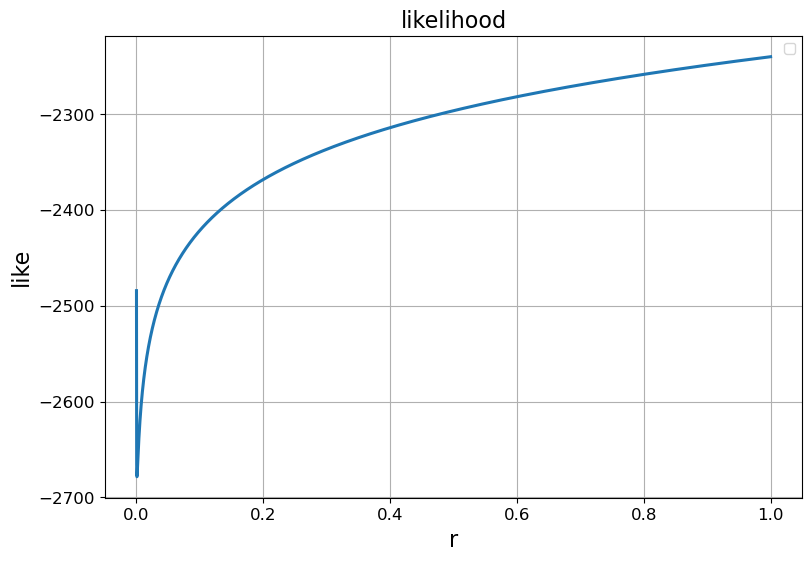

In [30]:
import matplotlib.pyplot as plt

#plot#
fig = plt.figure(figsize=(9, 6))

plt.plot(r_in, like_array , lw = 2.2)

plt.ylabel("like", fontsize=16)
plt.xlabel('r', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("likelihood", fontsize=16)

plt.grid()
plt.legend()

plt.show()

In [31]:
r_in[np.argmin(like_array)]

0.0007

###　カイ二乗検定

In [32]:
# 最小化したい関数を定義する例
def minimize_function_chi_sq(beta_s, r):
    
    cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r)+ N_cov

    Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

    x = x + noise_map_QU
    
    return x @ bslash(cov_mat, x)

### Likelihood

In [33]:
# 最小化したい関数を定義する例
def minimize_function_like(r, beta_s):
    
    cov_mat = dm.Cal_cov_mat(cov_mat_scal, cov_mat_tens, r)+ N_cov

    Q_1, U_1, x = dm.calc_x_pra(freq_band, cmb_freq, nside, cmb_map, "s1", freq_bs, beta_s, freq_bd, beta_d, T_d)

    x = x + noise_map_QU
    
    det_C = dm.log_det(cov_mat)
    
    return x @ bslash(cov_mat, x) + det_C

In [34]:
num_iterations = 10

for iteration in range(num_iterations):

    if iteration == 0:

        # chi sq スペクトルパラメータ決定
        beta_pre = -3
        r_pre = 0.001

        # minimize関数
        #result_p = minimize(minimize_function_chi_sq, beta_pre, args = (r_pre), bounds = [(-5., -2)], method='COBYLA')
        result_p = minimize(minimize_function_chi_sq, beta_pre, args = (r_pre), bounds = [(-5., -2)],method='L-BFGS-B')

        print(f"Iteration {iteration + 1}: beta_s = {result_p.x[0]}")
        
        # スペクトルパラメータを更新
        beta_s_pre = result_p.x[0]
        r_pre = 0.001
        
        #result_r = minimize(minimize_function_like, r_pre, args = (beta_s_pre), bounds = [(0., 1)], method='COBYLA')
        result_r = minimize(minimize_function_like, r_pre, args = (beta_s_pre), bounds = [(0., 1)], method='L-BFGS-B')
        
        print(f"Iteration {iteration + 1}: r = {result_r.x[0]}")

    else:
        
        # chi sq スペクトルパラメータ決定
        beta_pre = result_p.x[0]
        r_pre = result_r.x[0]

        # minimize関数
        #result = minimize(minimize_function_chi_sq, beta_pre, args = (r_pre), bounds = [(-5., -2)],method='BFGS')
        result_p = minimize(minimize_function_chi_sq, beta_pre, args = (r_pre), bounds = [(-5., -2)],method='L-BFGS-B')

        print(f"Iteration {iteration + 1}: beta_s = {result_p.x[0]}")
        
        # スペクトルパラメータを更新
        beta_s_pre = result_p.x[0]
        r_pre = result_r.x[0]
        
        #result_r = minimize(minimize_function_like, r_pre, args = (beta_s_pre), bounds = [(0., 1)], method='COBYLA')
        result_r = minimize(minimize_function_like, r_pre, args = (beta_s_pre), bounds = [(0., 1)], method='L-BFGS-B')
        
        print(f"Iteration {iteration + 1}: r = {result_r.x[0]}")

Iteration 1: beta_s = -3.0101437599899294
Iteration 1: r = 0.0007280591930120674
Iteration 2: beta_s = -3.0101441487689846
Iteration 2: r = 0.0007280591930120674
Iteration 3: beta_s = -3.0101440841033402
Iteration 3: r = 0.0007280591930120674
Iteration 4: beta_s = -3.010144079947851
Iteration 4: r = 0.0007280591930120674
Iteration 5: beta_s = -3.010144078339944
Iteration 5: r = 0.0007280591930120674
Iteration 6: beta_s = -3.010144078339944
Iteration 6: r = 0.0007280591930120674
Iteration 7: beta_s = -3.010144078339944
Iteration 7: r = 0.0007280591930120674
Iteration 8: beta_s = -3.010144078339944
Iteration 8: r = 0.0007280591930120674
Iteration 9: beta_s = -3.010144078339944
Iteration 9: r = 0.0007280591930120674
Iteration 10: beta_s = -3.010144078339944
Iteration 10: r = 0.0007280591930120674
